<a href="https://colab.research.google.com/github/Siamw/SRCNN_keras/blob/master/Image_colorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image colorization Assignment2


$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\argmin}{{\text{argmin}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\E}{\mathbf{E}}
\newcommand{\var}{\mathbf{var}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\B}{\mathbf{B}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> Optimization applications  </div>__
_<div style="text-align: right"> 2015100584 Ji-won Hwang (za_bc@naver.com) </div>_


A color image is represented by an $m\times n \times 3$ matrix of RGB intensities, so each pixel $p_{ij}$ can be represented by a three dimensional vector, 

$$
  p_{ij}=\bmat{r_{ij} \\ g_{ij} \\ b_{ij} }\in\R^3
$$
  
A natural grayscale intensity $w_{ij}$  can be obtained from the $r_{ij}$, $g_{ij}$, $b_{ij}$ intensities by the following relations, i.e., the grayscale intensity can be interpreted as a linear combination of the R/G/B intensity values.

\begin{align*}
  w_{ij} &= 0.299r_{ij} + 0.587g_{ij} + 0.114b_{ij} \\
  &= \bmat{0.299 & 0.587 & 0.114}p_{ij}
\end{align*}

In this problem you will be given an $m\times n \times 3$ image, most of whose color information is lost, and you will work on reconstructing the lost color information.

The following describes how those full color information or grayscale information are represented:
Each pixel in a color image consists of a three dimensional vector whose components describes the R/G/B intensities, however in this mostly colorless image, approximately 2% pixels contain those color information, 

$$
p_{ij} = \bmat{r_{ij} \\ g_{ij} \\ b_{ij}}
$$

while the rest 98% pixels contain three dimensional vectors whose three components are the grayscale intensity.

$$
p_{ij} = \bmat{w_{ij} \\ w_{ij} \\ w_{ij}}
$$

So by looking at the three components in each pixel, you can identify whether the corresponding pixel contains the correct color information, or not. If a pixel contains a three dimensional vector with all different components, that means the pixel contains the correct color information. If a pixel contains a three dimensional vector with identical components, that means the pixel's color information is lost.

Your job is to reconstruct the color information for those 98% pixels.

The following loads an $m\times n \times 3$ mostly colorless PNG image.

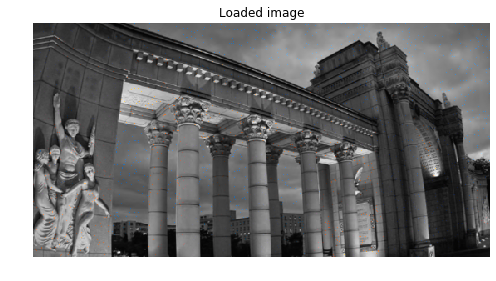

In [1]:
import numpy as np
import matplotlib.pyplot as plt

khu = plt.imread('http://jonghank.github.io/ee786/files/khu_x_2.png')
m, n = khu.shape[0:2]

khu_r = khu[:,:,0]
khu_g = khu[:,:,1]
khu_b = khu[:,:,2]

plt.figure(figsize=(18,9))
plt.subplot(121)
plt.imshow(khu)
plt.axis('off')
plt.title('Loaded image')
plt.show()

The image pretty much looks like a grayscale image. However if you zoom in, you will see some of them actually contain the color information.

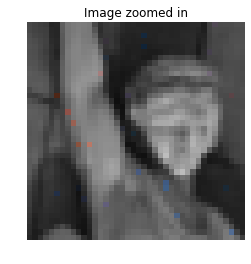

In [2]:
plt.figure()
plt.imshow(khu[110:150, 20:60, :])
plt.axis('off')
plt.title('Image zoomed in')
plt.show()

Identify the pixels with full color information, by comparing R/G/B intensities. In other words, find $m_\text{known}$, the row indices, and $n_\text{known}$, the column indices for the pixels with full color information, so that

$$
p_{ij} = \bmat{r_{ij} \\ g_{ij} \\ b_{ij}}, \qquad \text{if } i\in m_\text{known} \text{ and } j\in n_\text{known} 
$$

and $p_{ij} = \bmat{w_{ij} & w_{ij} & w_{ij}}^T$ otherwise.


In [0]:
# your code here
known_idx_x = []
known_idx_y = []
for i in range(m):
    for j in range(n): # gray가 아닌 부분 known_idx에 추가
        if khu_r[i][j] != khu_g[i][j] or khu_r[i][j] != khu_b[i][j] or khu_g[i][j] != khu_b[i][j]:
            known_idx_x.append(i)
            known_idx_y.append(j)
            
known_idx_x = np.asarray(known_idx_x, dtype=np.int64)
known_idx_y = np.asarray(known_idx_y, dtype=np.int64)
known_idx = tuple((known_idx_x,known_idx_y))

Now find the grayscale intensities for all the pixels, i.e., compute $w_{ij}$ for all $i$ and $j$.

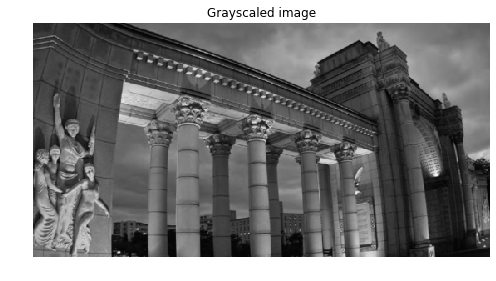

In [4]:
# your code here
from copy import deepcopy

khu_gray = deepcopy(khu) # make gray version khu
for idx in range(len(known_idx[0])):
    i = known_idx[0][idx]
    j = known_idx[1][idx]
    gray = 0.299*khu_gray[i][j][0] + 0.587*khu_gray[i][j][1] + 0.114*khu_gray[i][j][2]
    khu_gray[i][j][0] = gray
    khu_gray[i][j][1] = gray
    khu_gray[i][j][2] = gray

plt.figure(figsize=(18,9))
plt.subplot(121)
plt.imshow(khu_gray)
plt.axis('off')
plt.title('Grayscaled image')
plt.show()

Now paint the image with appropriate colors, by reconstructing the lost color information. So more formally, find

$$
p_{ij} = \bmat{r_{ij} \\ g_{ij} \\ b_{ij}}, \qquad \text{for } i\notin m_\text{known} \text{ or } j\notin n_\text{known} 
$$

that minimizes the $\ell_2$ total variation of the image  defined by

$$
\text{tv}(p) = \sum_i^{m-1} \sum_j ^{n-1} \left\| \bmat{p_{i+1,j}-p_{ij} \\ p_{i,j+1}-p_{ij} } \right\|_2
$$

You may refer to the TV inpainting example page from the `cvxpy` tutorials at https://www.cvxpy.org/examples/applications/tv_inpainting.html, for handling color images for `cvxpy.tv()` function. 

Also, your choice of objective function is not limited to the above total variation function. You can change it, or you can add regularizers, or you can do whatever you want. The job is just to find a natural color image that (somehow) matches the given information.

In [13]:
# your code here
import cvxpy as cp

R = cp.Variable((m,n))
G = cp.Variable((m,n))
B = cp.Variable((m,n))

R_known = khu_r[known_idx]
G_known = khu_g[known_idx]
B_known = khu_b[known_idx]

M = khu_gray[:,:,0] #gray khu

constraints = [
    0.299*R + 0.587*G + 0.114*B == M,
    R[known_idx] == R_known,
    G[known_idx] == G_known,
    B[known_idx] == B_known,
    0 <= R, 0 <= G, 0 <= B,
    1 >= R, 1 >= G, 1 >= B,
]

obj = cp.Minimize(cp.tv(R,G,B))
prob = cp.Problem(obj, constraints)
prob.solve(verbose=True, solver=cp.SCS)
print("optimal objective value: {}".format(prob.value))

----------------------------------------------------------------------------
	SCS v2.1.0 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 3410589
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 619569, constraints m = 2174775
Cones:	primal zero / dual free vars: 164292
	linear vars: 930600
	soc vars: 1079883, soc blks: 154269
Setup time: 3.73e+01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 7.32e+21  8.03e+21  8.91e-01 -8.23e+26 -4.76e+25  1.12e+27  9.23e-01 
   100| 7.98e-03  2.02e-02  2.38e-03  1.05e+04  1.05e+04  1.12e-11  9.18e+01 
   200| 5.31e-03  1.37e-02  1.30e-03 

Compare your painting with the original color image which can be downloaded from http://jonghank.github.io/ee786/files/khu_entrance.png. The original file is provided just for comparison; you are not allowed to use anything from it.

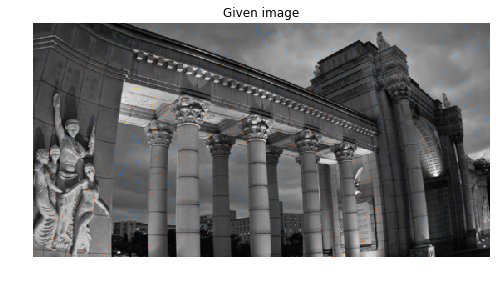

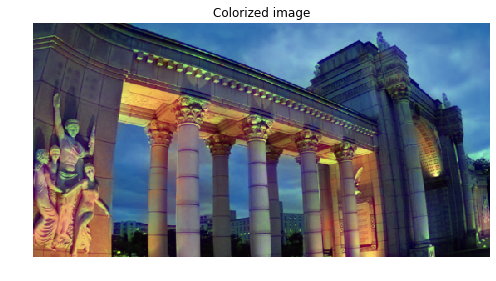

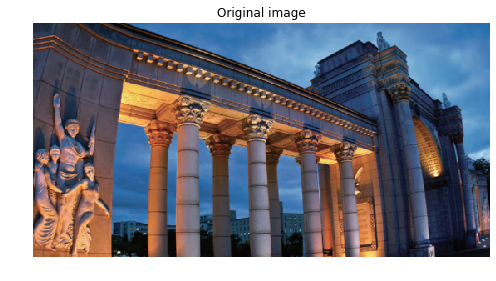

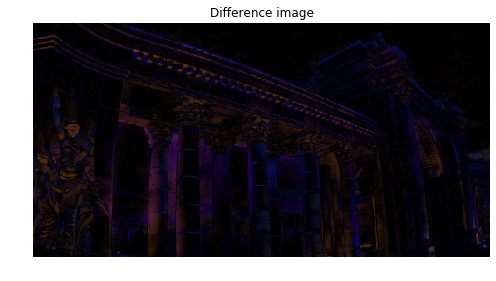

In [20]:
# your code here
khu_color_r = np.array(R.value)
khu_color_g = np.array(G.value)
khu_color_b = np.array(B.value)
khu_color = np.stack((khu_color_r, khu_color_g, khu_color_b), axis=2)
khu_color = np.clip(khu_color, 0, 1)

plt.figure(figsize=(18,9))
plt.subplot(121)
plt.imshow(khu)
plt.axis('off')
plt.title('Given image')
plt.show()

plt.figure(figsize=(18,9))
plt.subplot(121)
plt.imshow(khu_color)
plt.axis('off')
plt.title('Colorized image')
plt.show()

khu_origin = plt.imread('http://jonghank.github.io/ee786/files/khu_entrance.png')
khu_origin = khu_origin[:,:,:3]

plt.figure(figsize=(18,9))
plt.subplot(121)
plt.imshow(khu_origin)
plt.axis('off')
plt.title('Original image')
plt.show()

img_diff = np.abs(khu_origin - khu_color)
plt.figure(figsize=(18,9))
plt.subplot(121)
plt.imshow(img_diff)
plt.axis('off')
plt.title('Difference image')
plt.show()
